In [3]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [27]:
df = pd.read_csv("./dataset/2015-2017_CorporateCC_mb2.csv",engine = 'python')
# To display the top 5 rows 
df.head(5)

,Project Year,Account Number,Account Name,Question Number,Question Name,Row Number,Row Name,Column Number,Column Name,Response Answer
0,2015,58,ABM INDUSTRIES INC,CC0.1,Introduction Please give a general descriptio...,1,NaN,C0a,NaN,ABM (NYSE: ABM) is a leading provider of facil...
1,2015,64,Abbott Laboratories,CC0.1,Introduction Please give a general descriptio...,1,NaN,C0a,NaN,NaN
2,2015,119,Resolute Forest Products Inc.,CC0.1,Introduction Please give a general descriptio...,1,NaN,C0a,NaN,NaN
3,2015,234,"Advanced Call Center Technologies, LLC",CC0.1,Introduction Please give a general descriptio...,1,NaN,C0a,NaN,ACT is domestic (USA) outsourced call center s...
4,2015,285,3M Company,CC0.1,Introduction Please give a general descriptio...,1,NaN,C0a,NaN,NaN


**Check the data types**

In [115]:
df.dtypes

Project Year           int64
Company_unique_key     int64
Company               object
Question Number       object
Question Name         object
Row Number             int64
Column Number         object
Column Name           object
Response Answer       object
dtype: object

In [22]:
df.count()

Project Year       716739
Account Number     716739
Account Name       716739
Question Number    716739
Question Name      709365
Row Number         716739
Row Name                0
Column Number      709365
Column Name        682533
Response Answer    382545
dtype: int64

**Check for null values in the dataset**

In [28]:
df['Row Name'].isnull().sum()

716739

In [ ]:
#Since the column Row name all the values are blank. We may completely eliminate the column Row Name

**Remove the column Row Name**

In [29]:
df = df.drop(['Row Name'], axis=1)

#del df['Row Name']
#df = df.drop('Row Name', axis=1)
df.head(5)


,Project Year,Account Number,Account Name,Question Number,Question Name,Row Number,Column Number,Column Name,Response Answer
0,2015,58,ABM INDUSTRIES INC,CC0.1,Introduction Please give a general descriptio...,1,C0a,NaN,ABM (NYSE: ABM) is a leading provider of facil...
1,2015,64,Abbott Laboratories,CC0.1,Introduction Please give a general descriptio...,1,C0a,NaN,NaN
2,2015,119,Resolute Forest Products Inc.,CC0.1,Introduction Please give a general descriptio...,1,C0a,NaN,NaN
3,2015,234,"Advanced Call Center Technologies, LLC",CC0.1,Introduction Please give a general descriptio...,1,C0a,NaN,ACT is domestic (USA) outsourced call center s...
4,2015,285,3M Company,CC0.1,Introduction Please give a general descriptio...,1,C0a,NaN,NaN


**Rename the column names Account name, Account Number**

In [30]:
df = df.rename(columns={"Account Name": "Company", "Account Number": "Company_unique_key" })
df.head(5)

,Project Year,Company_unique_key,Company,Question Number,Question Name,Row Number,Column Number,Column Name,Response Answer
0,2015,58,ABM INDUSTRIES INC,CC0.1,Introduction Please give a general descriptio...,1,C0a,NaN,ABM (NYSE: ABM) is a leading provider of facil...
1,2015,64,Abbott Laboratories,CC0.1,Introduction Please give a general descriptio...,1,C0a,NaN,NaN
2,2015,119,Resolute Forest Products Inc.,CC0.1,Introduction Please give a general descriptio...,1,C0a,NaN,NaN
3,2015,234,"Advanced Call Center Technologies, LLC",CC0.1,Introduction Please give a general descriptio...,1,C0a,NaN,ACT is domestic (USA) outsourced call center s...
4,2015,285,3M Company,CC0.1,Introduction Please give a general descriptio...,1,C0a,NaN,NaN


In [59]:
df.shape

(716739, 9)

**Remove duplicate rows**

In [31]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (7620, 9)


In [32]:
df.count()

Project Year          716739
Company_unique_key    716739
Company               716739
Question Number       716739
Question Name         709365
Row Number            716739
Column Number         709365
Column Name           682533
Response Answer       382545
dtype: int64

In [33]:
df = df.drop_duplicates()
df.head(5)

,Project Year,Company_unique_key,Company,Question Number,Question Name,Row Number,Column Number,Column Name,Response Answer
0,2015,58,ABM INDUSTRIES INC,CC0.1,Introduction Please give a general descriptio...,1,C0a,NaN,ABM (NYSE: ABM) is a leading provider of facil...
1,2015,64,Abbott Laboratories,CC0.1,Introduction Please give a general descriptio...,1,C0a,NaN,NaN
2,2015,119,Resolute Forest Products Inc.,CC0.1,Introduction Please give a general descriptio...,1,C0a,NaN,NaN
3,2015,234,"Advanced Call Center Technologies, LLC",CC0.1,Introduction Please give a general descriptio...,1,C0a,NaN,ACT is domestic (USA) outsourced call center s...
4,2015,285,3M Company,CC0.1,Introduction Please give a general descriptio...,1,C0a,NaN,NaN


In [34]:
df.count()

Project Year          709119
Company_unique_key    709119
Company               709119
Question Number       709119
Question Name         701758
Row Number            709119
Column Number         701758
Column Name           674927
Response Answer       378741
dtype: int64

In [35]:
df['Column Name'].isnull().sum()

34192

In [37]:
df.head()
column_data = df[['Column Name','Response Answer']]

In [39]:
#print(column_data)
column_data.head(5)


,Column Name,Response Answer
0,NaN,ABM (NYSE: ABM) is a leading provider of facil...
1,NaN,NaN
2,NaN,NaN
3,NaN,ACT is domestic (USA) outsourced call center s...
4,NaN,NaN


Get a subset dataset to visualize and explore on gross global co2 emissions for scope1 each company

In [161]:
df_scope1_emissions = df[['Project Year', 'Company', 'Question Number', 'Question Name', 'Response Answer']] 

df_scope1_emissions = df_scope1_emissions[df_scope1_emissions['Question Number'] == "CC8.2"] 
df_scope1_emissions = df_scope1_emissions.dropna()
df_scope1_emissions.head()

df_scope1_emissions.isnull().sum()

Project Year       0
Company            0
Question Number    0
Question Name      0
Response Answer    0
dtype: int64

In [162]:
df_scope1_emissions['Response Answer'] = pd.to_numeric(df_scope1_emissions['Response Answer'])
print(df_scope1_emissions['Response Answer'].dtype)

float64


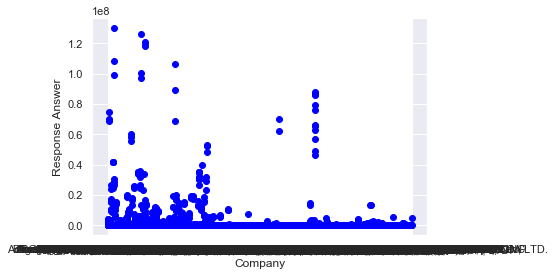

In [207]:
#plt.figure(figsize=(10,8))
plt.xlabel('Company')
plt.ylabel('Response Answer')
plt.scatter(df_scope1_emissions['Company'], df_scope1_emissions['Response Answer'], c = "Blue")
plt.show()


In [ ]:
From the above plot, we can conclude that the highest co2 emissions are from 12 billion metric tons from the company VXI GLOBAL SOLUTIONS INC
 Highest emissions -->
1) Exxon Mobil Corporation
2) American Electric Power Company, Inc.
3) Duke Energy Corporation
4) The AES Corporation
5) NRG Energy Inc

In [179]:
df_scope1_emissions_company = df_scope1_emissions[df_scope1_emissions['Company'].isin(["Exxon Mobil Corporation", "American Electric Power Company, Inc.", "Duke Energy Corporation", "The AES Corporation", "NRG Energy Inc"])]

df_scope1_emissions_company

,Project Year,Company,Question Number,Question Name,Response Answer
80583,2015,The AES Corporation,CC8.2,Please provide your gross global Scope 1 emis...,74972889.6
80607,2015,"American Electric Power Company, Inc.",CC8.2,Please provide your gross global Scope 1 emis...,130318824.0
80752,2015,Duke Energy Corporation,CC8.2,Please provide your gross global Scope 1 emis...,126000000.0
80774,2015,Exxon Mobil Corporation,CC8.2,Please provide your gross global Scope 1 emis...,121000000.0
80938,2015,NRG Energy Inc,CC8.2,Please provide your gross global Scope 1 emis...,106472000.0
312592,2016,The AES Corporation,CC8.2,Please provide your gross global Scope 1 emis...,68634068.0
312612,2016,"American Electric Power Company, Inc.",CC8.2,Please provide your gross global Scope 1 emis...,108610665.0
312751,2016,Duke Energy Corporation,CC8.2,Please provide your gross global Scope 1 emis...,100238000.0
312768,2016,Exxon Mobil Corporation,CC8.2,Please provide your gross global Scope 1 emis...,118000000.0
312941,2016,NRG Energy Inc,CC8.2,Please provide your gross global Scope 1 emis...,89214053.0


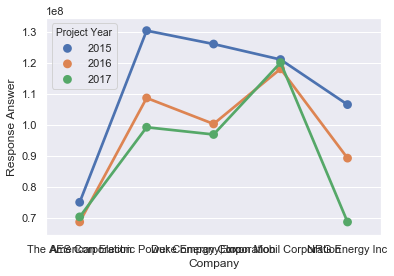

In [183]:
import seaborn as sns
sns.set(style="darkgrid")
year_based_emissions = sns.pointplot(x="Company", y="Response Answer", hue="Project Year", data=df_scope1_emissions_company)


In [ ]:
From the above graph we can conclude that the scope1 emissions are considerably less in 2017.
Let us check for company based co2 emissions

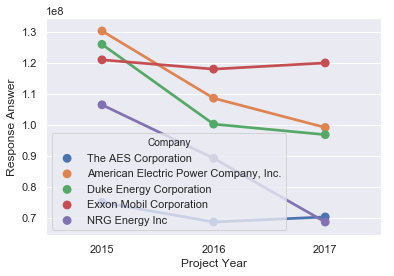

In [185]:
company_based_emissions = sns.pointplot(x="Project Year", y="Response Answer", hue="Company", data=df_scope1_emissions_company)

In [ ]:
From the above two graphs we can conclude that the co2 global emissions for each company is reducing, which is a good sign. Let us now analyze more on the steps that each company took to reduce the global co2 emissions.

Get a subset dataset to visualize and explore on gross global co2 emissions for scope2 each company

In [188]:
df_scope2_emissions = df[['Project Year', 'Company', 'Question Number', 'Question Name', 'Response Answer']] 

df_scope2_emissions = df_scope2_emissions[df_scope2_emissions['Question Number'] == "CC8.3"] 
df_scope2_emissions = df_scope2_emissions.dropna()
df_scope2_emissions.head()

df_scope2_emissions.isnull().sum()


Project Year       0
Company            0
Question Number    0
Question Name      0
Response Answer    0
dtype: int64

In [159]:
#df_scope2_emissions.count()
#df_scope2_emissions
#import re
#df_scope2_emissions['Response Answer'].str.replace('NaN','')
#df_scope2_emissions['Response Answer'].str.replace('nan','')
#re.sub(r'^(abc).*?(=[A-Z0-9]+)', '', str)
#re.sub(r"[^0-9]+", "", value)
#pattern = re.compile("[A-Za-z0-9]+")
#for i in df_scope2_emissions['Response Answer'].index: 
  #  print(df_scope2_emissions['Response Answer'][i])
    #re.sub(r"[^0-9]+", "",df_scope2_emissions['Response Answer'][i])
                                                           
    #print(df_scope2_emissions['Response Answer'][i])       
#df_scope2_emissions['Response Answer'].str.replace('nan','')
#df_scope2_emissions['Response Answer']._get_numeric_data()
#df_scope2_emissions[df_scope2_emissions['Response Answer] == ""]
#df_scope2_emissions['Response Answer'].head()
        
            
            
            
    
    #re.search('[a-zA-Z]',df_scope2_emissions['Response Answer'][i])
    #re.sub("[A-Za-z0-9]", '', df_scope2_emissions['Response Answer'][i])
#pattern = re.compile("[A-Za-z0-9]+")

#if(df_scope2_emissions['Response Answer'] contains pattern):
    
#re.sub("[A-Za-z0-9]", '', df_scope2_emissions['Response Answer'])

#df_scope2_emissions['Response Answer'].str.replace('*a*','')
#df_scope2_emissions['Response Answer'].str.replace('NaN','')

In [154]:
df_scope2_emissions['Response Answer'].isnull().sum()

0

In [189]:
df_scope2_emissions['Response Answer'] = pd.to_numeric(df_scope2_emissions['Response Answer'])
print(df_scope2_emissions['Response Answer'].dtype)

float64


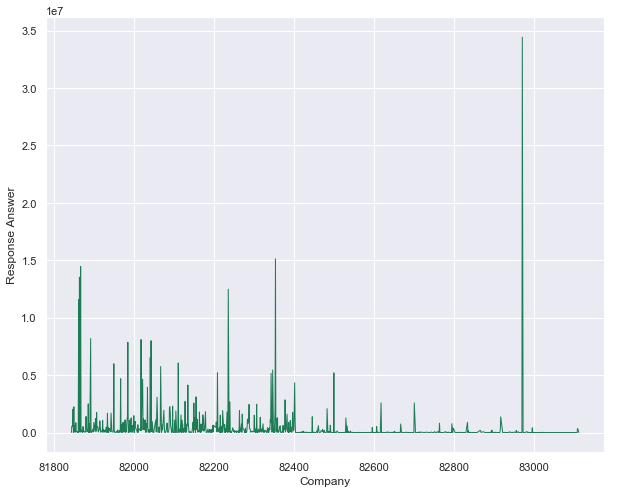

In [158]:
plt.figure(figsize=(10,8))
plt.xlabel('Company')
plt.ylabel('Response Answer')
plt.plot(df_scope2_emissions['Response Answer'],color='#1C7C54', linewidth=1.0 )
plt.show()

From the above plot, we can conclude that the highest co2 emissions are from 34 million metric tons from the company VXI GLOBAL SOLUTIONS INC
 Highest emissions -->
1) VXI GLOBAL SOLUTIONS INC
2) Wal-Mart Stores, Inc.
3) Allete Inc.
4) Alcoa Corp.
5) Praxair, Inc.

In [197]:
df_scope2_emissions_company = df_scope2_emissions[df_scope2_emissions['Company'].isin(["VXI GLOBAL SOLUTIONS INC", "Wal-Mart Stores, Inc.", "Allete Inc.", "Alcoa Corp.", "Praxair, Inc."])]


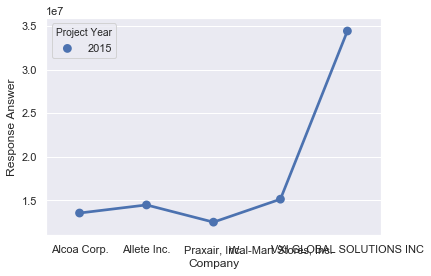

In [198]:

year_based_emissions = sns.pointplot(x="Company", y="Response Answer", hue="Project Year", data=df_scope2_emissions_company)


In [ ]:
Let us check if the emission data for 2016 and 2017 exists

In [194]:
df_scope2_emissions_year = df_scope2_emissions[df_scope2_emissions['Project Year'].isin(["2016", "2017"])]
df_scope2_emissions_year

,Project Year,Company,Question Number,Question Name,Response Answer


Let us check for emission data based on companies

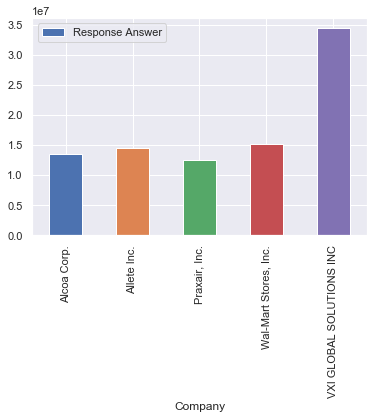

In [209]:
company_based_emissions = df_scope2_emissions_company.plot.bar(x="Company", y="Response Answer")

In [247]:
df_emissions = df[['Project Year', 'Company', 'Question Number', 'Question Name', 'Response Answer']] 
df_target_emissions = df_emissions[df_emissions['Question Number'] == "CC3.1"] 

df_target_emissions.head()

,Project Year,Company,Question Number,Question Name,Response Answer
28771,2015,ABM INDUSTRIES INC,CC3.1,Did you have an emissions reduction target th...,Intensity target
28772,2015,Abbott Laboratories,CC3.1,Did you have an emissions reduction target th...,Absolute and intensity targets
28773,2015,Resolute Forest Products Inc.,CC3.1,Did you have an emissions reduction target th...,Absolute target
28774,2015,"Advanced Call Center Technologies, LLC",CC3.1,Did you have an emissions reduction target th...,No
28775,2015,3M Company,CC3.1,Did you have an emissions reduction target th...,Intensity target


In [253]:
df_target_emissions['Response Answer'].replace({"Absolute target; Intensity target":"Absolute and intensity targets", "Absolute target; No":"Absolute target", "Intensity target; No":"Intensity target", "Absolute target; Renewable energy consumption and/or production target":"Absolute target", "Absolute target; Intensity target; Renewable energy consumption and/or production target":"Absolute target and Intensity target","Renewable energy consumption and/or production target":"" })

df_target_emissions = df_target_emissions[df_target_emissions['Response Answer'].isin(["Absolute and intensity targets","Absolute target", "No", "Intensity target"])]


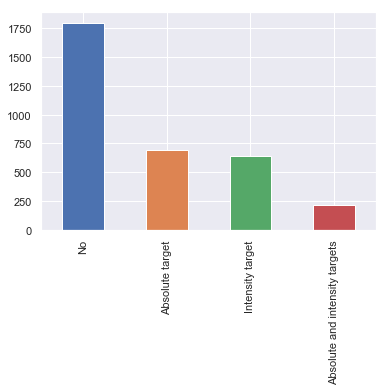

In [254]:
df_target_emissions["Response Answer"].value_counts().plot(kind='bar')


From the above plot, we may conclude that most companies have not set up any targets intensity or absolute targets to reduce the co2 global emissions.


In [261]:
df_target_emissions_company = df_target_emissions[['Project Year','Company','Response Answer']]
df_target_emissions_company.head()

,Project Year,Company,Response Answer
28771,2015,ABM INDUSTRIES INC,Intensity target
28772,2015,Abbott Laboratories,Absolute and intensity targets
28773,2015,Resolute Forest Products Inc.,Absolute target
28774,2015,"Advanced Call Center Technologies, LLC",No
28775,2015,3M Company,Intensity target


In [269]:
df_target_emissions_company_year = df_target_emissions_company[df_target_emissions_company['Company'].isin(["VXI GLOBAL SOLUTIONS INC", "Wal-Mart Stores, Inc.", "Allete Inc.", "Alcoa Corp.", "Praxair, Inc.", "Exxon Mobil Corporation", "American Electric Power Company, Inc.", "Duke Energy Corporation", "The AES Corporation", "NRG Energy Inc"])]
df_target_emissions_company_year


,Project Year,Company,Response Answer
28777,2015,The AES Corporation,Absolute target
28789,2015,Alcoa Corp.,Intensity target
28792,2015,Allete Inc.,Intensity target
28801,2015,"American Electric Power Company, Inc.",Absolute target
28929,2015,Duke Energy Corporation,Absolute and intensity targets
28951,2015,Exxon Mobil Corporation,No
29100,2015,NRG Energy Inc,Absolute target
29129,2015,"Praxair, Inc.",Absolute and intensity targets
29236,2015,"Wal-Mart Stores, Inc.",Absolute and intensity targets
29828,2015,VXI GLOBAL SOLUTIONS INC,Absolute target


In [278]:
grouped = df_target_emissions_company_year.groupby('Response Answer')
grouped.groups
grouped.size()

Response Answer
Absolute and intensity targets     7
Absolute target                   12
Intensity target                   3
No                                 3
dtype: int64

In [286]:
grouped_year = df_target_emissions_company_year.groupby('Project Year')
grouped_year.size()

Project Year
2015    10
2016     8
2017     7
dtype: int64

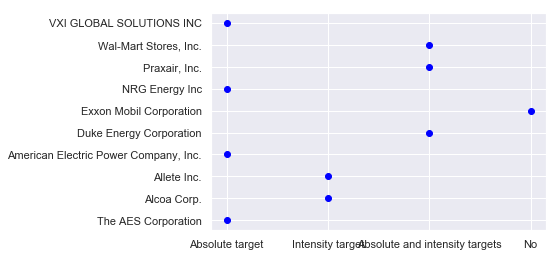

In [310]:
df_target_emissions_company_year_2015 = df_target_emissions_company_year[df_target_emissions_company_year['Project Year'].isin(['2015'])]
df_target_emissions_company_year_2015
#y = df_target_emissions_company_year_2015["Response Answer"].value_counts()
plt.scatter(df_target_emissions_company_year_2015['Response Answer'], df_target_emissions_company_year_2015['Company'], c = "Blue")



From the above graph it is clear that VXI global solutions with highest scope2 co2 emissions have Absolute target whereas Exxon with highest scope1 co2 emisssions have no targets set up in 2015. Let us check for 2016 and 2017.

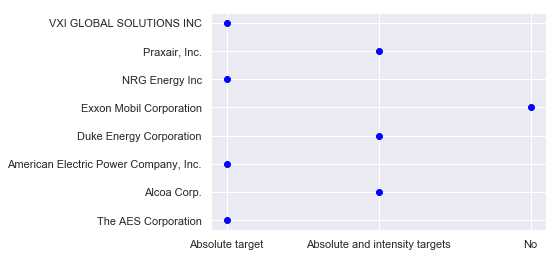

In [312]:
df_target_emissions_company_year_2016 = df_target_emissions_company_year[df_target_emissions_company_year['Project Year'].isin(['2016'])]
df_target_emissions_company_year_2016
#y = df_target_emissions_company_year_2015["Response Answer"].value_counts()
plt.scatter(df_target_emissions_company_year_2016['Response Answer'], df_target_emissions_company_year_2016['Company'], c = "Blue")


Similarly, VXI global solutions with highest scope2 co2 emissions have Absolute target whereas Exxon with highest scope1 co2 emisssions have no targets set up in 2016.


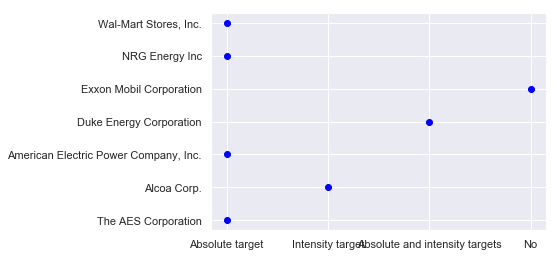

In [313]:
df_target_emissions_company_year_2017 = df_target_emissions_company_year[df_target_emissions_company_year['Project Year'].isin(['2017'])]
df_target_emissions_company_year_2017
#y = df_target_emissions_company_year_2015["Response Answer"].value_counts()
plt.scatter(df_target_emissions_company_year_2017['Response Answer'], df_target_emissions_company_year_2017['Company'], c = "Blue")


VXI global solutions with highest scope2 co2 emissions have not reported any target whereas Exxon with highest scope1 co2 emisssions have no targets set up in 2017. 

Exxon mobile has reported to have maximum global co2 emissions and reported as not following any emission reduction steps.